Consider the following three regressors applied on kin8nm.arff data (available at the webpage):  
− linear regression with Ridge regularization term of 0.1 
− two MLPs – 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2 – each with two hidden layers of size 10, hyperbolic tangent 
function as the activation function of all nodes, a maximum of 500 iterations, and a fixed 
seed (random_state=0). 𝑀𝐿𝑃1 should be parameterized with early stopping while 𝑀𝐿𝑃2 
should not consider early stopping. Remaining parameters (e.g., loss function, batch size, 
regularization term, solver) should be set as default.  
Using a 70-30 training-test split with a fixed seed (random_state=0)

##### 4) Compute the MAE of the three regressors: linear regression, MLP1 and MLP2

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from scipy.io.arff import loadarff
from sklearn import model_selection
from sklearn import metrics

#load data
data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])
df.head()

,theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8,y
0,-0.015119,0.360741,0.469398,1.309675,0.988024,-0.025493,0.664071,0.062763,0.536524
1,0.360478,-0.301395,0.629183,-1.440146,-0.741637,-1.196749,-1.038444,-0.717461,0.308014
2,1.563238,-1.294753,0.078987,1.432937,1.149136,-1.292140,1.562988,-0.937731,0.518900
3,0.199485,0.901157,-1.356304,-0.080525,-0.976628,0.829894,-0.855649,0.930630,0.494151
4,0.659737,0.120552,-0.008756,0.648839,0.626832,-0.646539,1.318074,-0.899172,0.470218


In [30]:
#split data
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y.values, train_size=0.7, random_state=0)

#train models and get MAE for Ridge
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)
print('Ridge Regression MAE: ', mean_absolute_error(y_test, rr.predict(X_test)))

Ridge Regression MAE:  0.162829976437694


In [31]:
#train models and get MAE for MLPs
mlp1 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0, early_stopping=True)
mlp2 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', max_iter=500, random_state=0)

mlp1.fit(X_train, y_train)
print("MAE for MLP1: ", mean_absolute_error(y_test, mlp1.predict(X_test)))

mlp2.fit(X_train, y_train)
print("MAE for MLP2: ", mean_absolute_error(y_test, mlp2.predict(X_test)))

MAE for MLP1:  0.0680414073796843
MAE for MLP2:  0.0978071820387748


##### 5) Plot the residues (in absolute value) using two visualizations: boxplots and histograms. 

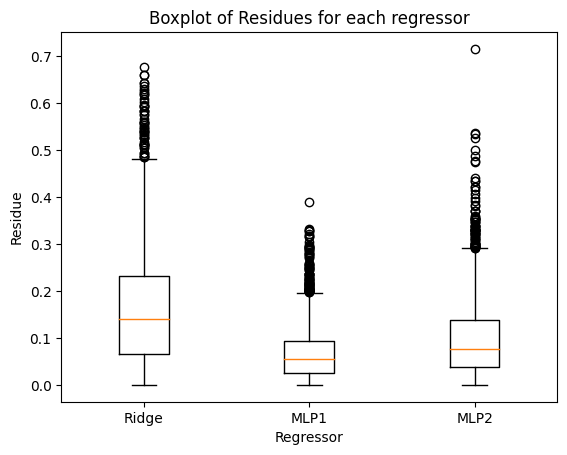

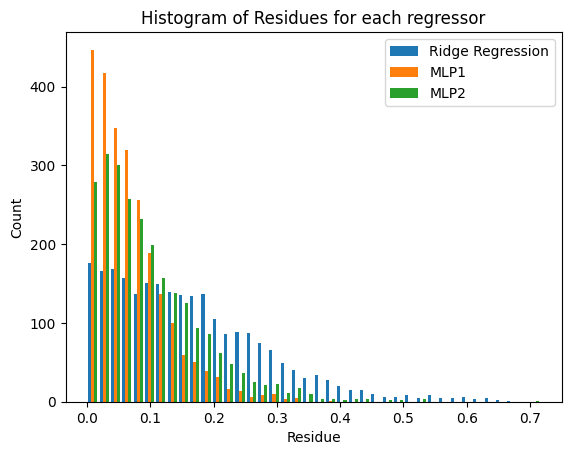

In [32]:
#plots
import matplotlib.pyplot as plt

#Plot the residues (in absolute value) using two visualizations: boxplots and histograms. 

#boxplot
bp = plt.boxplot([abs(y_test - rr.predict(X_test)), abs(y_test - mlp1.predict(X_test)), abs(y_test - mlp2.predict(X_test))])
plt.xticks([1, 2, 3], ['Ridge', 'MLP1', 'MLP2'])
plt.ylabel('Residue')
plt.xlabel('Regressor')
plt.title('Boxplot of Residues for each regressor')
plt.show()

#histogram
plt.hist([abs(y_test - rr.predict(X_test)), abs(y_test - mlp1.predict(X_test)), abs(y_test - mlp2.predict(X_test))], bins=40, label=['Ridge Regression', 'MLP1', 'MLP2'])
plt.legend()
plt.title('Histogram of Residues for each regressor')
plt.ylabel('Count')
plt.xlabel('Residue')
plt.show()

##### 6) How many iterations were required for 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2 to converge?

In [33]:
#iterations required for MLP1 and MLP2 to converge
print('MLP1 iterations: ', mlp1.n_iter_)
print('MLP2 iterations: ', mlp2.n_iter_)

MLP1 iterations:  452
MLP2 iterations:  77


##### 7) What can be motivating the unexpected differences on the number of iterations? Hypothesize one reason underlying the observed performance differences between the MLPs. 

In a batch gradient descent algorithm, the number of iterations matches the number of epochs run. In this case, the number of iterations required for MLP1 and MLP2 to converge is very different (452 vs 77). This might be related to the fact that MLP1 uses early stopping and MLP2 not. 

Early stopping is a method that stops the training when the validation score is not improving by at least e⁻⁴ {1} for 10 {2} consecutive epochs and it is done to avoid overfitting. 

The validation set may contain samples from both training and test sets since the parameter **shuffle** is set to True by default. Therefore, the training process may converge after a diferent amount of epochs depending on the samples in the validation set. 

MLP2 doesn't use early stopping, so it will continue to train until it reaches the maximum number of iterations (500) and, therefore, it is more likely to overfit the data. However, MLP2 stoped at 77 iterations, which is much less than 500.

The difference in the number of iterations required for MLP2 to converge is much lower compared to MLP1, probably, because each model use a different training set and due to the fact that MLP1 uses early stopping and MLP2 not. 
Since, MLP2 has a higher MAE and is more overfitted than MLP1, we can conclude that MLP1 has a better performance than MLP2.


{1} - default **tol** (tolerance) in MLPRegressor function

{2} - default maximum number of epochs to not meet **tol** improvement in MLPRegressor function (n_iter_no_change)